## Not Informed Analysis

This analysis is done without peeking at the learning outcomes.

### Setup

We import the `coilnlp` package and load in pre-processed dataframes. Note that `numpy`, `pandas`, and `matplotlib.pyplot` have already been imported as `np`, `pd`, and `plt`, respectively.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from coilnlp import *

In [3]:
# sentences
covid = pd.read_csv('covid-sent.csv', header = 0)
gender = pd.read_csv('gender-sent.csv', header = 0)
english = pd.read_csv('english-sent.csv', header = 0)
sent = pd.concat([covid, gender, english], ignore_index = True)

In [4]:
sent.tail()

,TOPIC,STATE,DOCNUM,SENTENCE
991,english,us,9,many jobs will even consider hiring an applic...
992,english,us,9,our group all agreed as individuals who have ...
993,english,us,9,english has become an added benefit to know i...
994,english,us,9,once you can overcome some of the beginning i...
995,english,us,9,NaN


In [5]:
# documents
covid = pd.read_csv('covid-docs.csv', header = 0)
gender = pd.read_csv('gender-docs.csv', header = 0)
english = pd.read_csv('english-docs.csv', header = 0)
docs = pd.concat([covid, gender, english], ignore_index = True)

In [6]:
docs.head()

,TOPIC,STATE,DOCNUM,TEXT
0,covid,iq,1,the covid 19 pandemic has transformed the cont...
1,covid,iq,10,well today me and my group talked about covid ...
2,covid,iq,11,it was an interesting conversation with my par...
3,covid,iq,12,in the educational process covid 19 changes ev...
4,covid,iq,13,okay in our group discussion meeting today we ...


### Word Frequencies

We explore words at high and low frequency in the corpus. Using various methods, we identify candidate words for future searches.

In [7]:
help(make_word_cloud)

Help on function make_word_cloud in module coilnlp.functions:

make_word_cloud(df, max_words=25, min_len=3, collocations=True)
    Make word cloud
    
    :param df: documents corpus
    :type df: pandas DataFrame
    :param max_words: words in cloud
    :type max_words: int
    :param min_len: filter for word length
    :type min_len: int
    :param collocations: consider ngrams
    :type collocations: bool
    
    :returns: word cloud
    :rtype: WordCloud object



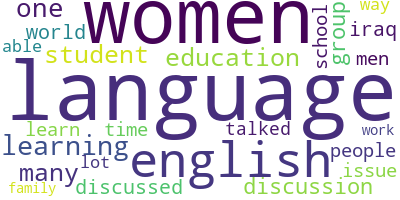

In [8]:
make_word_cloud(docs).to_image()

In [9]:
help(word_counts)

Help on function word_counts in module coilnlp.functions:

word_counts(df, max_words=25, ascending=False, stoppers=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both',

In [10]:
word_counts(docs, max_words = 100)

{'english': 198,
 'language': 190,
 'women': 132,
 'learning': 125,
 'also': 110,
 'group': 82,
 'one': 78,
 'education': 77,
 'us': 77,
 'many': 76,
 'gender': 75,
 'discussed': 68,
 'students': 63,
 'discussion': 62,
 'iraq': 56,
 'people': 53,
 'world': 52,
 'learn': 51,
 'men': 49,
 'talked': 45,
 'able': 41,
 'online': 40,
 'like': 40,
 'school': 39,
 'family': 38,
 'issues': 37,
 'lingua': 37,
 'lot': 37,
 'different': 37,
 'time': 36,
 'life': 36,
 'covid': 36,
 'work': 35,
 'countries': 35,
 'society': 35,
 'franca': 34,
 'think': 33,
 'languages': 32,
 'even': 32,
 'way': 32,
 'use': 31,
 'however': 30,
 'would': 30,
 'much': 29,
 'woman': 29,
 'topic': 29,
 'study': 29,
 'pandemic': 29,
 'experience': 29,
 'important': 27,
 'coil': 27,
 'another': 26,
 'families': 26,
 'second': 26,
 'used': 26,
 'well': 26,
 'especially': 25,
 'first': 25,
 '19': 24,
 'internet': 24,
 'issue': 24,
 'inequality': 24,
 'person': 23,
 'great': 23,
 'impact': 23,
 'things': 23,
 'communicate': 2

The word cloud shows some of the most frequent words in the corpus. We noted other interesting words in the print output: (us, united, states), (iraq, iraqi), (family, families), (internet, online), (inequality, equality), rights, (communicate, communication), (school, schools, education), impact, access, difference, able, opportunities, lack, affected.

#### Juxtaposed word clouds

United States (COVID-19)


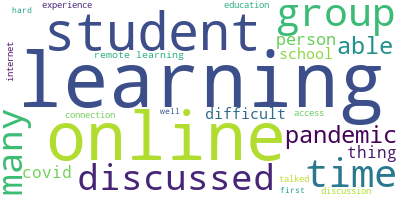

In [11]:
print('United States (COVID-19)')
make_word_cloud(docs[(docs['STATE'] == 'us') & (docs['TOPIC'] == 'covid')]).to_image()

Iraq (COVID-19)


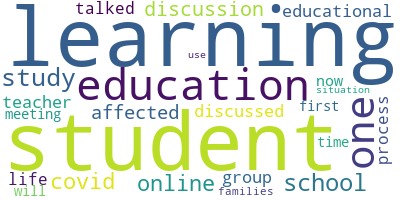

In [12]:
print('Iraq (COVID-19)')
make_word_cloud(docs[(docs['STATE'] == 'iq') & (docs['TOPIC'] == 'covid')]).to_image()

For the COVID-19 prompt, we see that able, access, and internet are words used by the US students. Meanwhile, affected is used the the IQ students.

United States (Gender)


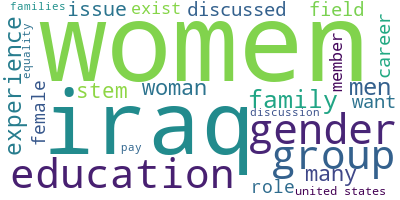

In [13]:
print('United States (Gender)')
make_word_cloud(docs[(docs['STATE'] == 'us') & (docs['TOPIC'] == 'gender')]).to_image()

Iraq (Gender)


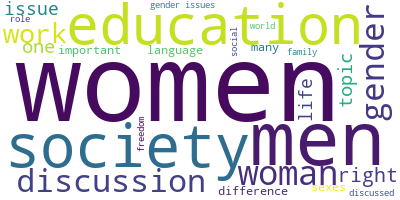

In [14]:
print('Iraq (Gender)')
make_word_cloud(docs[(docs['STATE'] == 'iq') & (docs['TOPIC'] == 'gender')]).to_image()

For the gender prompt, we see that stem, field, career, want, and pay are used by the US students. Meanwhile, freedom, right, difference, society, and world are used by the IQ students. Both groups use the word role.

United States (English)


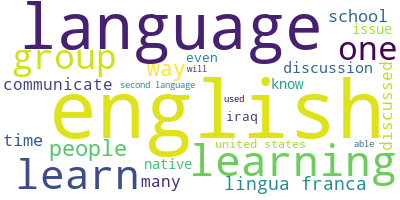

In [15]:
print('United States (English)')
make_word_cloud(docs[(docs['STATE'] == 'us') & (docs['TOPIC'] == 'english')]).to_image()

Iraq (English)


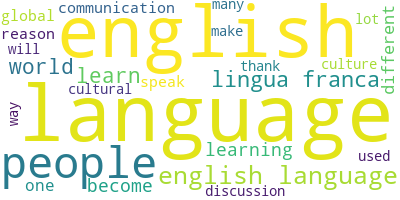

In [16]:
print('Iraq (English)')
make_word_cloud(docs[(docs['STATE'] == 'iq') & (docs['TOPIC'] == 'english')]).to_image()

For the lingua franca prompt, we see that know, able, native, and second are used by the US students. Meanwhile, global, world, culture, and become are used by the IQ students.

#### n-grams

n-grams are words that appear adjacent to one another in the text. These may signal a compound idea or a word association. We can study counts and clouds in the same way.

In [17]:
ngrams(sent)

{'group_discussed': 19,
 'united_states': 19,
 'lingua_franca': 18,
 'english_lingua': 17,
 'gender_inequality': 15,
 'gender_issues': 14,
 'online_learning': 13,
 'covid_pandemic': 12,
 'also_discussed': 12,
 'coil_partners': 11,
 'second_language': 11,
 'native_language': 11,
 'speak_english': 10,
 'remote_learning': 9,
 'learning_new': 9,
 'around_world': 8,
 'also_talked': 8,
 'gender_equality': 8,
 'english_become': 8,
 'using_english': 8,
 'group_members': 7,
 'mental_health': 7,
 'english_second': 7,
 'pros_cons': 7,
 'often_times': 7,
 'religious_freedom': 7,
 'gender_inequalities': 7,
 'global_language': 7,
 'many_things': 6,
 'high_school': 6,
 'would_like': 5,
 'people_different': 5,
 'parts_world': 5,
 'similarities_differences': 5,
 'one_another': 5,
 'talked_lot': 5,
 'medical_care': 5,
 'widely_used': 5,
 'day_week': 4,
 'able_communicate': 4,
 'short_term': 4,
 'thank_much': 4,
 'internet_connection': 4,
 'even_though': 4,
 'higher_education': 4,
 'previous_discussion':

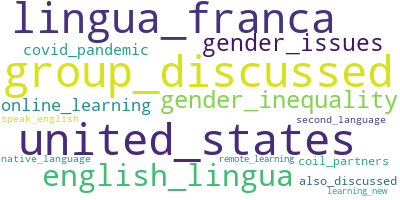

In [18]:
ngram_cloud(ngrams(sent)).to_image()

#### Term frequency inverse document frequency

Each document focuses on some words and ideas more so than other words and ideas. We can look at the most frequent words for each document.

In [19]:
top_tfidf_terms(docs[docs['TOPIC'] == 'covid'], 3)

,Topic,State,DocID,Tfidf 1,Tfidf 2,Tfidf 3
0,covid,iq,1,lessons,current,platforms
1,covid,iq,10,development,strength,cent
2,covid,iq,11,opinions,opportunity,study
3,covid,iq,12,study,changes,classes
4,covid,iq,13,yeah,actually,affected
5,covid,iq,2,students,families,spread
6,covid,iq,3,allowed,washington,lectures
7,covid,iq,4,effects,team,epidemic
8,covid,iq,5,learning,ve,students
9,covid,iq,6,speak,prof,coilers


In [20]:
top_tfidf_terms(docs[docs['TOPIC'] == 'gender'], 3)

,Topic,State,DocID,Tfidf 1,Tfidf 2,Tfidf 3
0,gender,iq,1,justice,men,spirit
1,gender,iq,10,tasks,men,women
2,gender,iq,11,proper,education,sexes
3,gender,iq,12,iraqi,society,women
4,gender,iq,13,weaknesses,basically,equally
5,gender,iq,14,departments,like,terms
6,gender,iq,15,correct,violation,society
7,gender,iq,2,language,civil,personality
8,gender,iq,3,discrimination,women,opinions
9,gender,iq,4,legal,protections,violence


In [21]:
top_tfidf_terms(docs[docs['TOPIC'] == 'english'], 3)

,Topic,State,DocID,Tfidf 1,Tfidf 2,Tfidf 3
0,english,iq,1,language,english,reason
1,english,iq,2,language,today,thanks
2,english,iq,3,english,reason,language
3,english,iq,4,language,spoke,joint
4,english,iq,5,language,members,meeting
5,english,iq,6,english,sovereign,official
6,english,iq,7,english,language,world
7,english,iq,8,language,academic,session
8,english,iq,9,english,language,iraqi
9,english,na,1,things,having,intended


#### Novel words

While most words not found in the WordNet English dictionary are mistyped/misspelled, some are foreign words. These words are interesting in that they indicate cross-cultural communication.

In [22]:
novel = novel_words(docs)

In [23]:
with open('novel-export.txt', 'w') as f:
    for word in novel:
        f.write(word)
        f.write('\n')

We saved these words in a text file. Manually removing misspelled/mistyped words, we arrive at a list of novel words. We save this modified list in the text file `novel-import.txt`. 

In [24]:
with open('novel-import.txt', 'r') as f:
    print(f.read().split('\n')[:-1])

['hokkien', 'cordish', 'alsalamu', 'quranic', "qur'an", 'nisaa', 'aleikum', '1948', 'toefl', 'surah', 'brigham']


### Polarity

Sentiment analysis assigns a score from -1 to 1 for sentences / paragraphs. We use the rule-based sentiment model from the TextBlob module. Each word is given a marginal score and these marginal scores are combined to arrive at a final score.

In [25]:
subset = sent[sent['TOPIC'] == 'gender']
frequent = word_counts(docs[docs['TOPIC'] == 'gender'])
pos = {x : (polarity_counts(x, subset)['positive'], y) for x, y in frequent.items()}
sorted(pos.items(), key = lambda kv : (kv[1][0],kv[0]), reverse = True)

[('men', (132, 49)),
 ('us', (121, 19)),
 ('women', (107, 132)),
 ('gender', (55, 75)),
 ('education', (39, 47)),
 ('equality', (36, 18)),
 ('iraq', (34, 36)),
 ('one', (33, 22)),
 ('also', (28, 34)),
 ('many', (26, 29)),
 ('woman', (24, 29)),
 ('family', (23, 30)),
 ('issues', (21, 26)),
 ('society', (20, 31)),
 ('work', (19, 23)),
 ('inequality', (19, 23)),
 ('group', (19, 26)),
 ('freedom', (19, 17)),
 ('discussion', (18, 25)),
 ('world', (16, 21)),
 ('discussed', (16, 22)),
 ('rights', (15, 19)),
 ('lot', (15, 17)),
 ('life', (12, 19)),
 ('inequalities', (8, 18))]

In [26]:
subset = sent[sent['TOPIC'] == 'gender']
frequent = word_counts(docs[docs['TOPIC'] == 'gender'])
pos = {x : (polarity_counts(x, subset)['negative'], y) for x, y in frequent.items()}
sorted(pos.items(), key = lambda kv : (kv[1][0],kv[0]), reverse = True)

[('us', (26, 19)),
 ('men', (23, 49)),
 ('women', (16, 132)),
 ('gender', (12, 75)),
 ('iraq', (7, 36)),
 ('inequalities', (6, 18)),
 ('group', (6, 26)),
 ('work', (5, 23)),
 ('one', (5, 22)),
 ('discussed', (5, 22)),
 ('world', (4, 21)),
 ('woman', (4, 29)),
 ('life', (4, 19)),
 ('also', (4, 34)),
 ('society', (3, 31)),
 ('family', (3, 30)),
 ('equality', (3, 18)),
 ('education', (3, 47)),
 ('discussion', (3, 25)),
 ('rights', (2, 19)),
 ('lot', (2, 17)),
 ('issues', (2, 26)),
 ('inequality', (2, 23)),
 ('freedom', (1, 17)),
 ('many', (0, 29))]

Admittedly, we do not see anything noteworthy in this first example of sentiment analysis. We do not explore this package feature further.

### Topic Modeling

We explore two statistical methods to find topics in documents: latent Dirichlet allocation and non-negative matrix factorization.

In [27]:
help(lda)

Help on function lda in module coilnlp.functions:

lda(df, num_topics, corpus_type=True, no_below=2, min_count=3, min_len=3, stoppers=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'a

In [28]:
bow, mdl = lda(docs, 3)
lda_topics(mdl, bow, 10)

,Topic 1,Topic 2,Topic 3
0,language,woman,learning
1,english,gender,student
2,learning,men,online
3,learn,education,covid
4,also,family,also
5,people,inequality,school
6,lingua,issue,pandemic
7,one,society,group
8,franca,iraq,education
9,group,also,time


In [29]:
bow, mdl = lda(docs, 6)
lda_topics(mdl, bow, 10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,language,learning,woman,woman,life,woman
1,english,student,education,gender,woman,gender
2,learning,online,family,men,conversation,inequality
3,learn,covid,iraq,right,power,gender_inequality
4,also,school,gender,society,issue,also
5,people,also,issue,family,need,learning
6,lingua,education,society,discussion,gender,world
7,franca,one,also,life,right,get
8,one,time,men,iraq,related,discussed
9,group,group,group,stem,important,access


For latent Dirichlet allocation, we find three main groups that correspond to the three prompts. Inferring more groups results in less interpretable groups.

In [30]:
help(nmf)

Help on function nmf in module coilnlp.functions:

nmf(df, num_topics, corpus_type=True, min_count=3, min_len=3, stoppers=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 

In [31]:
vectorizer, mdl = nmf(docs, 3)
nmf_topics(mdl, vectorizer, 3, 10)

,Topic 1,Topic 2,Topic 3
0,english,women,learning
1,language,gender,pandemic
2,lingua,men,covid
3,franca,inequalities,students
4,people,iraq,online
5,learn,education,education
6,languages,legal,impact
7,learning,family,study
8,used,woman,also
9,communicate,abuse,personal


In [32]:
vectorizer, mdl = nmf(docs, 6)
nmf_topics(mdl, vectorizer, 6, 10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,english,women,learning,power,girls,lingua
1,language,gender,pandemic,circle,education,franca
2,people,men,covid,masculinity,agreed,message
3,lingua,legal,online,ideally,drop,translation
4,learn,iraq,students,ground,pressured,con
5,languages,inequalities,education,seemingly,perusing,intended
6,franca,woman,impact,break,girl,things
7,learning,abuse,study,unbreakable,partner,effectively
8,used,family,personal,address,students,lost
9,know,inequality,first,linkage,marriage,benefit


In [33]:
vectorizer, mdl = nmf(docs, 10)
nmf_topics(mdl, vectorizer, 10, 10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,english,women,learning,power,girls,lingua,legal,abuse,pandemic,personal
1,language,men,online,square,education,franca,protections,women,impact,persevered
2,people,gender,students,linkage,perusing,con,violence,face,mutual,rejoice
3,lingua,iraq,covid,masculinity,pressured,translation,domestic,upward,permanent,probably
4,learn,inequalities,study,seemingly,drop,intended,protection,trend,covid,pursuits
5,franca,woman,talked,address,agreed,message,women,appears,exchanged,outlook
6,languages,stem,also,circle,girl,things,lack,spousal,increasing,miss
7,used,families,affected,ideally,partner,effectively,unsafe,family,expressed,doubt
8,learning,rights,time,unbreakable,students,lost,workplace,police,views,shown
9,know,work,day,break,marriage,benefit,compromise,pressures,corona,anxiety


In [34]:
vectorizer, mdl = nmf(docs, 15)
nmf_topics(mdl, vectorizer, 15, 10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15
0,english,women,students,power,girls,lingua,legal,pandemic,abuse,personal,study,inequalities,sexes,follow,home
1,language,men,learning,unbreakable,education,franca,protections,impact,women,rejoice,bad,iraq,proper,women,find
2,people,gender,covid,break,pressured,con,violence,mutual,face,probably,materials,partners,weaknesses,expectations,learning
3,lingua,woman,online,square,perusing,translation,domestic,permanent,trend,pursuits,talked,coil,female,stem,eat
4,learn,work,pandemic,strongly,drop,message,protection,covid,upward,persevered,problems,idea,equally,placed,focusing
5,franca,society,educational,address,agreed,intended,women,exchanged,appears,outlook,talk,seen,education,understood,expert
6,languages,issues,day,circle,girl,things,lack,expressed,spousal,miss,meeting,gender,see,united,transportation
7,used,rights,affected,ground,partner,effectively,workplace,increasing,family,doubt,suits,lingering,basically,states,challenging
8,learning,america,time,linkage,students,lost,compromise,views,police,shown,glad,accepting,difference,common,meals
9,know,freedom,allowed,seemingly,marriage,benefit,unsafe,foremost,pressures,anxiety,angles,overcoming,treated,discriminated,online


For non-negative matrix factorization, we find the same three major groups. These groups are described by more interesting words. NMF fairs better for more groups, but the groups are still not well-separated. Some interesting words in NMF topics are power, masculinity, pressured, legal, protections, violence, domestic, workplace, abuse, and unsafe.

### Sentences

Words are great, but context is important! Based on key words we notice above, we can search for the sentences where the words reside. We can print these in the notebook, or we can print them to a file.

In [35]:
# printing
for tup in find_word_in_sentences('power', sent):
    print('Topic : ' + tup[0])
    print('State : ' + tup[1])
    print('DocID : ' + str(tup[2]))
    print('Text : ' + tup[5])
    print('\n')

Topic : english
State : us
DocID : 1
Text : our group discussed the power associated with the english language quite a bit .  we talked about if one language would be used all over the world we think it would be english  however we didn't deny the possibility that one other language could replace english but we think it would take a while to happen


Topic : english
State : iq
DocID : 2
Text :  generally speaking lingua franca is 'a language adopted as a common language between speakers whose native language are different .  the' power' of english it does not mean the strengh or to be forced language but because it spreed and that most people around the world talk it and learn it in order to communicate with others .  we have discussion me and my coil partners about the other language that maybe use instaed of english we suggests france and spain


Topic : gender
State : na
DocID : 2
Text : i do strongly think that we still need much more efforts to address issues related to the sense 

In [36]:
# saving
with open('searches/power-iq-gender.txt', 'w') as f:
    for tup in find_word_in_sentences('power', sent[(sent['TOPIC'] == 'gender') & (sent['STATE'] == 'iq')]):
        f.write('Topic : ' + tup[0]); f.write('\n')
        f.write('State : ' + tup[1]); f.write('\n')
        f.write('DocID : ' + str(tup[2])); f.write('\n')
        f.write('Text : ' + tup[5]); f.write('\n')
        f.write('\n')

Some words parts to consider:
* power
* internet
* online
* impact
* access
* able
* opportunities
* lack
* affected
* differ
* famil
* equal
* school
* education
* right
* second
* native
* know
* global
* world
* culture
* stem
* field
* career
* want
* pay
* freedom
* society
* become
* legal
* protect
* violen
* work
* domestic
* abuse
* unsafe
* mascul
* mental

In [37]:
words = ['power', 'internet', 'online', 'impact', 'access', 'able', 'opportun', 
         'lack', 'affect', 'differ', 'famil', 'equal', 'school', 'educat',
         'right', 'second', 'first', 'native', 'know', 'global', 'world',
         'cultur', 'stem', 'field', 'career', 'want', 'pay', 'freedom',
         'societ', 'become', 'legal', 'protect', 'violen', 'work',
         'domestic', 'abuse', 'safe', 'mascul', 'mental'
        ]

In [38]:
# saving
import re
for word in words:
    with open('searches/' + word + '-iq-gender.txt', 'w') as f:
        for tup in set(find_word_in_sentences(word, sent[(sent['TOPIC'] == 'gender') & (sent['STATE'] == 'iq')])):
            f.write('Topic : ' + tup[0]); f.write('\n')
            f.write('State : ' + tup[1]); f.write('\n')
            f.write('DocID : ' + str(tup[2])); f.write('\n')
            f.write('Text : ' + re.sub(r'\.', '.\n', tup[5])); f.write('\n')
            f.write('\n')
    with open('searches/' + word + '-us-gender.txt', 'w') as f:
        for tup in set(find_word_in_sentences(word, sent[(sent['TOPIC'] == 'gender') & (sent['STATE'] == 'us')])):
            f.write('Topic : ' + tup[0]); f.write('\n')
            f.write('State : ' + tup[1]); f.write('\n')
            f.write('DocID : ' + str(tup[2])); f.write('\n')
            f.write('Text : ' + re.sub(r'\.', '.\n', tup[5])); f.write('\n')
            f.write('\n')
    with open('searches/' + word + '-iq-covid.txt', 'w') as f:
        for tup in set(find_word_in_sentences(word, sent[(sent['TOPIC'] == 'covid') & (sent['STATE'] == 'iq')])):
            f.write('Topic : ' + tup[0]); f.write('\n')
            f.write('State : ' + tup[1]); f.write('\n')
            f.write('DocID : ' + str(tup[2])); f.write('\n')
            f.write('Text : ' + re.sub(r'\.', '.\n', tup[5])); f.write('\n')
            f.write('\n')
    with open('searches/' + word + '-us-covid.txt', 'w') as f:
        for tup in set(find_word_in_sentences(word, sent[(sent['TOPIC'] == 'covid') & (sent['STATE'] == 'us')])):
            f.write('Topic : ' + tup[0]); f.write('\n')
            f.write('State : ' + tup[1]); f.write('\n')
            f.write('DocID : ' + str(tup[2])); f.write('\n')
            f.write('Text : ' + re.sub(r'\.', '.\n', tup[5])); f.write('\n')
            f.write('\n')
    with open('searches/' + word + '-iq-english.txt', 'w') as f:
        for tup in set(find_word_in_sentences(word, sent[(sent['TOPIC'] == 'english') & (sent['STATE'] == 'iq')])):
            f.write('Topic : ' + tup[0]); f.write('\n')
            f.write('State : ' + tup[1]); f.write('\n')
            f.write('DocID : ' + str(tup[2])); f.write('\n')
            f.write('Text : ' + re.sub(r'\.', '.\n', tup[5])); f.write('\n')
            f.write('\n')
    with open('searches/' + word + '-us-english.txt', 'w') as f:
        for tup in set(find_word_in_sentences(word, sent[(sent['TOPIC'] == 'english') & (sent['STATE'] == 'us')])):
            f.write('Topic : ' + tup[0]); f.write('\n')
            f.write('State : ' + tup[1]); f.write('\n')
            f.write('DocID : ' + str(tup[2])); f.write('\n')
            f.write('Text : ' + re.sub(r'\.', '.\n', tup[5])); f.write('\n')
            f.write('\n')

## End of Notebook

To close, we use the package `coilnlp` to search for sentences containing words that have interesting statistical behavior for the given dataset and research problem. Please review the saved text files to make interpretations and conclusions.